In [1]:
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
Nside=512
Npix=Nside**2*12
gmap=hp.read_map("/home/anze/work/Sheho/Xpol/pla/HFI_SkyMap_100_2048_R2.02_halfmission-1.fits")
gmap=hp.ud_grade(gmap,Nside)

NSIDE = 2048
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT


/home/anze/local/anaconda/lib/python2.7/site-packages/healpy/fitsfunc.py:335: UserWarning: No INDXSCHM keyword in header file : assume IMPLICIT
  "assume {}".format(schm))


Ordering converted to RING


/home/anze/local/anaconda/lib/python2.7/site-packages/healpy/projaxes.py:808: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
  result[np.isinf(val.data)] = -np.inf


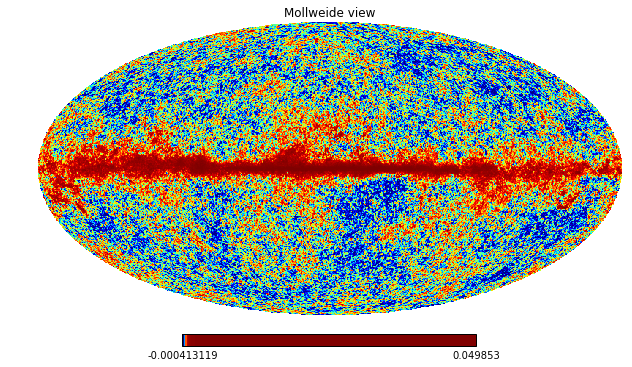

In [3]:
hp.mollview(gmap,norm='hist')

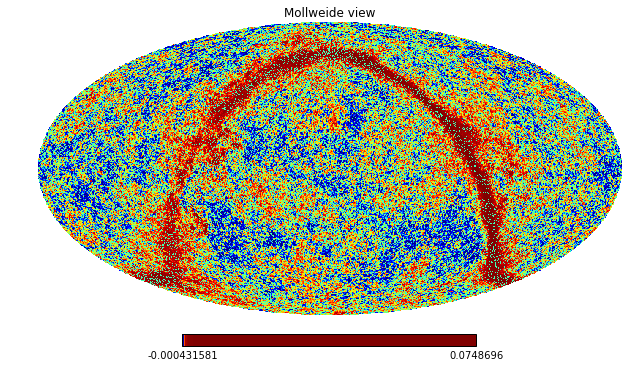

In [4]:
## method 1, see also https://healpy.readthedocs.io/en/latest/generated/healpy.rotator.Rotator.html#healpy.rotator.Rotator
theta_g,phi_g=hp.pix2ang(Nside,range(Npix))
r = hp.Rotator(coord=['G','E'],deg=False)
theta_e, phi_e = r(theta_g, phi_g)
pixe=hp.ang2pix(Nside,theta_e,phi_e)
emap=np.zeros(Npix)
emap[pixe]=gmap
hp.mollview(emap,norm='hist')

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


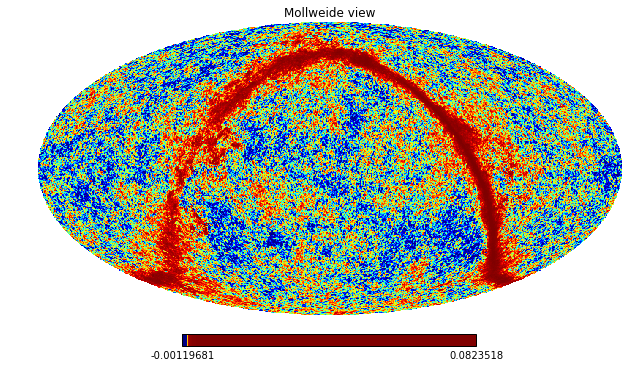

In [5]:
## method 2
## We ran 
"""
!! to compile
!! gfortran -fPIC -O3  -DGFORTRAN -fno-second-underscore -o rot rot.f90 -L../lib -lhealpix -lgomp
!! Returns:
!! 1.4593748453675195        1.0504796202735345       -3.1411934726869077   
!!

program test
  use coord_v_convert, only: coordsys2euler_zyz
  use alm_tools, only: rotate_alm
  double precision psi, theta, phi
  call coordsys2euler_zyz(2000.0d0, 2000.0d0, 'G', 'E', psi, theta, phi)
  print *,psi,theta,phi
  
end program test

subroutine ftvers
end subroutine ftvers

subroutine ftexist
end subroutine ftexist

"""
psi,theta,phi=1.4593748453675195,1.0504796202735345,-3.1411934726869077
almg=hp.map2alm(gmap)
hp.rotate_alm(almg,psi,theta,phi) ## rotate rotates in-place
emap2=hp.alm2map(almg,Nside)
hp.mollview(emap2,norm='hist')